In [11]:
using Pkg
Pkg.status()

Status `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Project.toml`
  [634d3b9d] DrWatson v2.19.1
  [e9467ef8] GLMakie v0.13.7
  [28b8d3ca] GR v0.73.19
  [c8e1da08] IterTools v1.10.0
  [b964fa9f] LaTeXStrings v1.4.0
  [91a5bcdd] Plots v1.41.1


In [12]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



[ Info: Precompiling GRIJuliaExt [84369c5d-ffb2-5a92-8288-3470980d96d0] 
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling HNProcess [top-level] 
[ Info: Precompiling DataRefine [top-level] 
[ Info: Precompiling PartitioningData [top-level] 


In [18]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


# V2

In [19]:
conv_16 = 0
twos_16 = 0 
others_16 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(16)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_16 += 1
        end
        if sol_count == 2
            twos_16 += 1 
        end
        if sol_count > 2
            others_16 += 1 
        end
    end
end
println("Number of convs: $(conv_16)")
println("Number of twos: $(twos_16)")
println("Number of more than two sols: $(others_16)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 98
Number of more than two sols: 0
took 0.682657417 seconds


In [20]:
conv_64 = 0
twos_64 = 0 
others_64 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(64)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_64 += 1
        end
        if sol_count == 2
            twos_64 += 1 
        end
        if sol_count > 2
            others_64 += 1 
        end
    end
end
println("Number of convs: $(conv_64)")
println("Number of twos: $(twos_64)")
println("Number of more than two sols: $(others_64)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 97
Number of more than two sols: 0
took 9.163389 seconds


In [21]:
conv_256 = 0
twos_256 = 0 
others_256 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(256)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_256 += 1
        end
        if sol_count == 2
            twos_256 += 1 
        end
        if sol_count > 2
            others_256 += 1 
        end
    end
end
println("Number of convs: $(conv_256)")
println("Number of twos: $(twos_256)")
println("Number of more than two sols: $(others_256)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 75
Number of more than two sols: 0
took 201.528252834 seconds


In [33]:
conv_256 = 0
twos_256 = 0 
others_256 = 0
elp = @elapsed begin
    for i in 1:10
        parameters["images"] = three_random_orthogonal_image(1024)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_256 += 1
        end
        if sol_count == 2
            twos_256 += 1 
        end
        if sol_count > 2
            others_256 += 1 
        end
    end
end
println("Number of convs: $(conv_256)")
println("Number of twos: $(twos_256)")
println("Number of more than two sols: $(others_256)")
println("took $elp seconds")

Number of convs: 2
Number of twos: 0
Number of more than two sols: 0
took 916.76247875 seconds


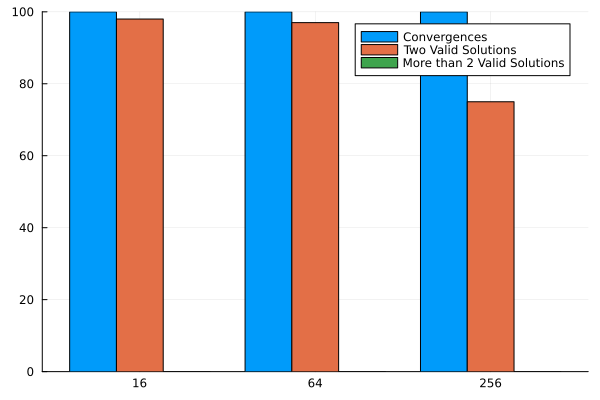

In [23]:
sizes = ["16", "64", "256"]
convs = [conv_16, conv_64, conv_256]
twos = [twos_16, twos_64, twos_256]
others = [others_16, others_64, others_256]

groupedbar(sizes, [convs twos others], bar_position = :dodge,
           labels = ["Convergences" "Two Valid Solutions" "More than 2 Valid Solutions"])

# HN OG

In [27]:
hn_conv_16 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(16)
        r = HN_Solver(parameters)
        if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_16 +=1 
        end
    end
end
println(hn_conv_16)
println("took $elp seconds")

100
took 0.748407917 seconds


In [28]:
hn_conv_64 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(64)
        r = HN_Solver(parameters)
        if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_64 +=1 
        end
    end
end
println(hn_conv_64)
println("took $elp seconds")

97
took 9.149203042 seconds


In [29]:
hn_conv_256 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(256)
        r = HN_Solver(parameters)
        if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_256 +=1 
        end
    end
end
println(hn_conv_256)
println("took $elp seconds")

83
took 199.903060958 seconds


┌ Warning: Keyword argument bar_position not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, 

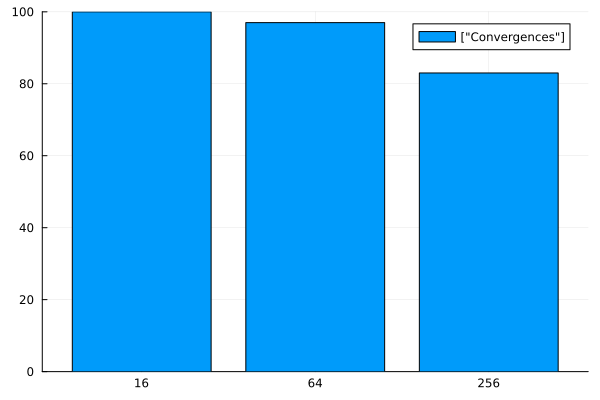

In [32]:
sizes = ["16", "64", "256"]
convs = [hn_conv_16, hn_conv_64, hn_conv_256]

bar(sizes, convs, bar_position = :dodge,
           labels = ["Convergences"])